In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import networkx as nx
from scipy.stats import pearsonr

In [2]:
hamsterster = nx.read_edgelist("hamsterster.txt", nodetype=int)
hamsterster = hamsterster.to_undirected()
hamsterster.remove_edges_from(nx.selfloop_edges(hamsterster))
Gcc = sorted(nx.connected_components(hamsterster), key=len, reverse=True)
hamsterster = hamsterster.subgraph(Gcc[0])
hamsterster = nx.convert_node_labels_to_integers(hamsterster, first_label=0)

In [3]:
USairport = nx.read_edgelist("USairport500.txt", nodetype = int)
USairport = USairport.to_undirected()
USairport.remove_edges_from(nx.selfloop_edges(USairport))
Gcc = sorted(nx.connected_components(USairport), key = len, reverse = True)
USairport = USairport.subgraph(Gcc[0])
USairport = nx.convert_node_labels_to_integers(USairport, first_label = 0)

In [4]:
jazz = nx.read_edgelist("jazz.txt", nodetype = int)
jazz = jazz.to_undirected()
jazz.remove_edges_from(nx.selfloop_edges(jazz))
Gcc = sorted(nx.connected_components(jazz), key = len, reverse = True)
jazz = jazz.subgraph(Gcc[0])
jazz = nx.convert_node_labels_to_integers(jazz, first_label = 0)

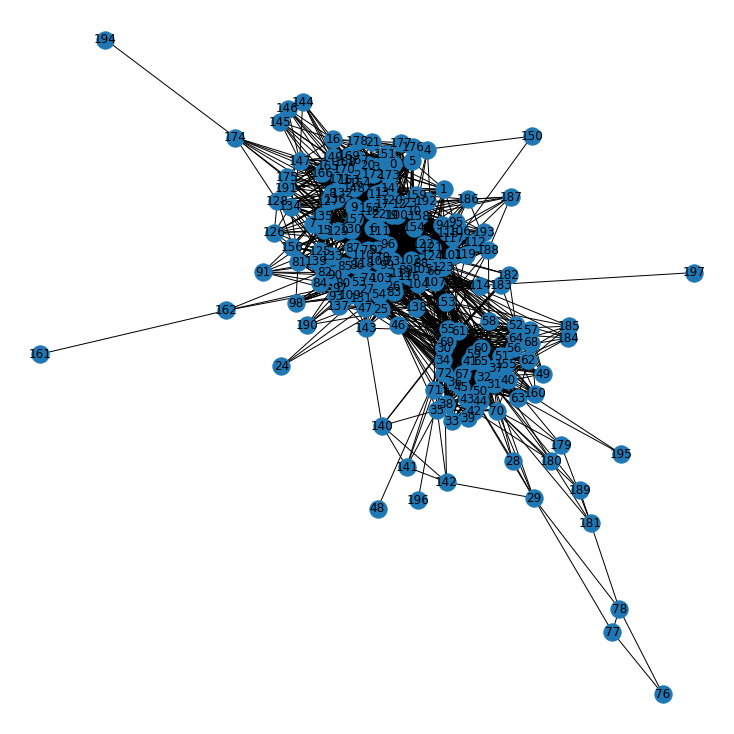

In [7]:
plt.figure(figsize=(10,10))
pos=nx.spring_layout(jazz)
nx.draw(jazz, with_labels = True, pos = pos)
plt.show(True)

In [8]:
vk = dict(jazz.degree())
vk = list(vk.values())
print('Degree centrality', vk)

Degree centrality [23, 21, 29, 43, 12, 23, 96, 20, 26, 42, 40, 46, 60, 49, 49, 23, 20, 60, 56, 75, 43, 10, 74, 45, 3, 25, 46, 39, 4, 7, 41, 45, 40, 16, 46, 25, 31, 29, 19, 19, 23, 39, 22, 23, 24, 24, 31, 24, 1, 13, 28, 31, 19, 42, 37, 31, 17, 16, 20, 40, 33, 52, 18, 16, 17, 40, 100, 31, 17, 54, 20, 12, 25, 56, 45, 36, 2, 3, 4, 57, 27, 23, 26, 42, 25, 32, 33, 29, 53, 62, 30, 9, 59, 24, 27, 26, 41, 28, 13, 44, 55, 31, 29, 23, 35, 23, 27, 23, 59, 31, 53, 48, 20, 39, 15, 27, 55, 28, 46, 17, 43, 41, 39, 31, 52, 20, 13, 41, 19, 19, 20, 13, 51, 16, 18, 19, 46, 21, 37, 20, 6, 5, 5, 13, 8, 9, 8, 24, 48, 38, 2, 30, 27, 36, 39, 22, 11, 19, 29, 25, 14, 1, 4, 39, 40, 34, 34, 37, 32, 31, 32, 33, 34, 33, 9, 13, 14, 14, 18, 5, 6, 5, 6, 6, 7, 7, 12, 8, 17, 3, 6, 10, 14, 18, 1, 2, 1, 1]


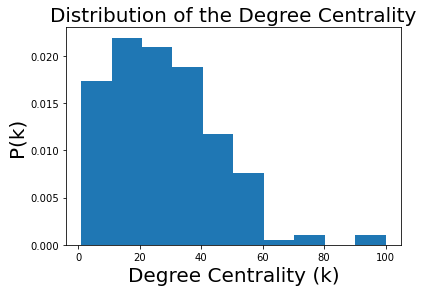

In [9]:
plt.figure(figsize=(6,4))
plt.hist(vk, density=True)
plt.title("Distribution of the Degree Centrality", fontsize=20)
plt.ylabel("P(k)", fontsize=20)
plt.xlabel("Degree Centrality (k)", fontsize=20)
#plt.grid(True)
#plt.savefig('degree-centrality.eps')
plt.show(True)

In [10]:
CLC = dict(nx.closeness_centrality(jazz))
print('Closeness centrality', CLC)

Closeness centrality {0: 0.42919389978213507, 1: 0.4613583138173302, 2: 0.48402948402948404, 3: 0.4613583138173302, 4: 0.44269662921348313, 5: 0.4310722100656455, 6: 0.5898203592814372, 7: 0.42919389978213507, 8: 0.48284313725490197, 9: 0.49873417721518987, 10: 0.5038363171355499, 11: 0.5116883116883116, 12: 0.5367847411444142, 13: 0.5157068062827225, 14: 0.5157068062827225, 15: 0.4457013574660634, 16: 0.4129979035639413, 17: 0.5324324324324324, 18: 0.5253333333333333, 19: 0.5549295774647888, 20: 0.4613583138173302, 21: 0.4121338912133891, 22: 0.5811209439528023, 23: 0.5077319587628866, 24: 0.3588342440801457, 25: 0.4746987951807229, 26: 0.5225464190981433, 27: 0.5184210526315789, 28: 0.3724007561436673, 29: 0.37595419847328243, 30: 0.5225464190981433, 31: 0.5116883116883116, 32: 0.49747474747474746, 33: 0.3971774193548387, 34: 0.5090439276485789, 35: 0.4164904862579281, 36: 0.4497716894977169, 37: 0.4613583138173302, 38: 0.40286298568507156, 39: 0.38703339882121807, 40: 0.452873563218

In [11]:
CLC = list(CLC.values())
av_clc = np.mean(CLC)
print('Average closeness centrality', av_clc)

Average closeness centrality 0.45762949484981463


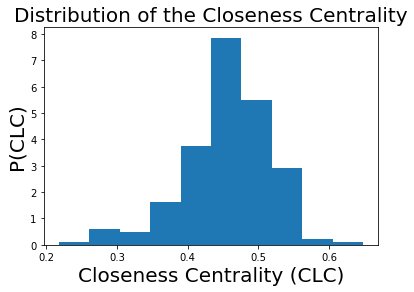

In [12]:
plt.figure(figsize=(6,4))
plt.hist(CLC, density=True)
plt.title("Distribution of the Closeness Centrality", fontsize=20)
plt.ylabel("P(CLC)", fontsize=20)
plt.xlabel("Closeness Centrality (CLC)", fontsize=20)
plt.savefig('closeness.eps')
plt.show(True)

In [13]:
# Betweenness centrality
B = dict(nx.betweenness_centrality(jazz))
print('Betweeness centrality:', B)

Betweeness centrality: {0: 0.0008513422227538616, 1: 0.000576395661344594, 2: 0.006628843999510174, 3: 0.0022079518594218354, 4: 0.0008563381619116213, 5: 0.0008049075549189744, 6: 0.057538917986120125, 7: 0.0014357560586310259, 8: 0.004031837519016956, 9: 0.0132893368620473, 10: 0.004313951504203767, 11: 0.0034177056601804854, 12: 0.014079075573855255, 13: 0.004380981675579163, 14: 0.004792559595517551, 15: 0.0020186484902902833, 16: 0.0018039443649464698, 17: 0.009455168971331605, 18: 0.008640471063891916, 19: 0.01763825797061753, 20: 0.0022079518594218354, 21: 0.0006870915225716011, 22: 0.03960002124911093, 23: 0.006242303054039882, 24: 0.0, 25: 0.002260757682448444, 26: 0.01120601445771569, 27: 0.00936329192644748, 28: 0.0, 29: 0.02831690720752705, 30: 0.0682920696351983, 31: 0.03938115832854973, 32: 0.01469472152076343, 33: 0.00023492142066375708, 34: 0.027238029691584086, 35: 0.004148971995121466, 36: 0.0022033834205052996, 37: 0.002635299429570574, 38: 0.00016028466832078712, 39

In [14]:
B = list(B.values())
av_B = np.mean(B)
print('Average betweenness centrality', av_B)

Average betweenness centrality 0.006301228382446657


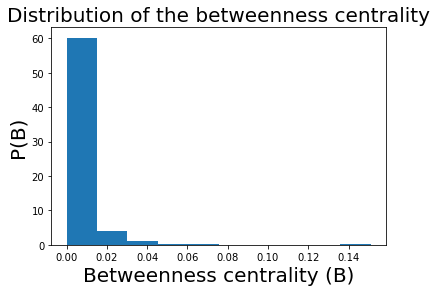

In [15]:
plt.figure(figsize=(6,4))
plt.hist(B, density=True)
plt.title("Distribution of the betweenness centrality", fontsize=20)
plt.ylabel("P(B)", fontsize=20)
plt.xlabel("Betweenness centrality (B)", fontsize=20)
plt.savefig('betweenness.eps')
plt.show(True)

In [16]:
EC = dict(nx.eigenvector_centrality(jazz, max_iter = 1000))
print('Eigenvetor centrality:', EC)

Eigenvetor centrality: {0: 0.0584622179318791, 1: 0.06235076912278248, 2: 0.06352308338108592, 3: 0.10712792346308947, 4: 0.023415544827038733, 5: 0.059690570516574205, 6: 0.21040760255783508, 7: 0.04129125181088389, 8: 0.05812962734451663, 9: 0.1020540520310077, 10: 0.10516272171542196, 11: 0.12697486492482013, 12: 0.14818176294884172, 13: 0.13065208249205545, 14: 0.13008426271281814, 15: 0.04859221621370993, 16: 0.03531516415077755, 17: 0.15531651037408603, 18: 0.146567740372703, 19: 0.1843457226835589, 20: 0.10712792346308947, 21: 0.01599987050681629, 22: 0.1668743247466703, 23: 0.11092195443924874, 24: 0.005856685691886459, 25: 0.054255248166697696, 26: 0.09684124831956434, 27: 0.0833280935646754, 28: 0.0024826874979867295, 29: 0.002520058186450621, 30: 0.033999869561746436, 31: 0.03311393583792984, 32: 0.029735096966660556, 33: 0.009118239901372385, 34: 0.04243735739546253, 35: 0.014217270503825371, 36: 0.021608543146889102, 37: 0.024619960695722788, 38: 0.012279344910606688, 39: 

In [17]:
EC = list(EC.values())
av_EC = np.mean(EC)
print('Average eigenvector centrality', av_EC)

Average eigenvector centrality 0.05587251505930271


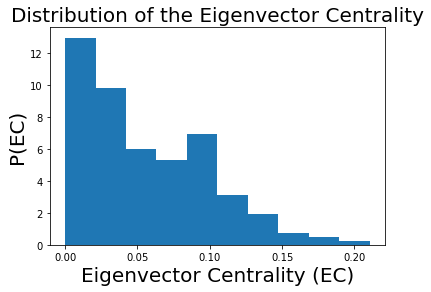

In [18]:
plt.figure(figsize=(6,4))
plt.hist(EC, density=True)
plt.title("Distribution of the Eigenvector Centrality",fontsize=20)
plt.ylabel("P(EC)", fontsize=20)
plt.xlabel("Eigenvector Centrality (EC)", fontsize=20)
plt.savefig('eigenvector.eps')
plt.show(True)

In [19]:
# Page-rank
PR = dict(nx.pagerank(jazz, alpha=0.85))
print("PageRank: ", PR)

PageRank:  {0: 0.0040542743786735735, 1: 0.0036298549390891503, 2: 0.005209316576796491, 3: 0.0067710355148003915, 4: 0.0025503283665934537, 5: 0.004020554271111061, 6: 0.014547956774619697, 7: 0.0036687876924427435, 8: 0.004665455240792085, 9: 0.006862707924183666, 10: 0.006348121073056098, 11: 0.0070428732800945784, 12: 0.009252881141315875, 13: 0.007526997296145855, 14: 0.0075252092680801195, 15: 0.004096604727493826, 16: 0.003948478855530476, 17: 0.009060762038158074, 18: 0.008477095263097461, 19: 0.011216290798180817, 20: 0.006771035514800393, 21: 0.002328077778060872, 22: 0.011461609126898621, 23: 0.007112614875989315, 24: 0.0011971697579319885, 25: 0.004562511150487438, 26: 0.007553333777609052, 27: 0.006649855811192519, 28: 0.0017581453713551422, 29: 0.0036578187981131547, 30: 0.009258128446924271, 31: 0.00994157097011403, 32: 0.008295633443323467, 33: 0.003634642202411609, 34: 0.009369996338512732, 35: 0.005727188598140397, 36: 0.006255073706698528, 37: 0.005889893230253308, 3

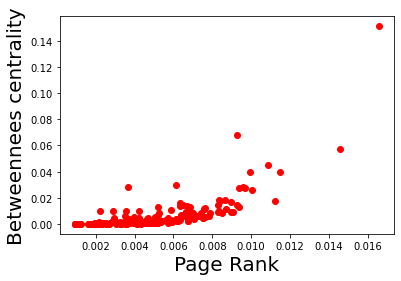

In [20]:
PR = dict(nx.pagerank(jazz, alpha=0.85))
PR = list(PR.values())
PR = np.array(PR)

B = dict(nx.betweenness_centrality(jazz))
B = list(B.values())
B = np.array(B)
plt.figure(figsize=(6,4))
plt.ylabel("Betweennees centrality", fontsize = 20)
plt.xlabel("Page Rank", fontsize = 20)
plt.plot(PR, B, 'ro')
plt.show(True)

In [21]:
PR = dict(nx.pagerank(jazz, alpha=0.85))
PR = list(PR.values())
av_pr = np.mean(PR)
print('Average PageRank', av_pr)

Average PageRank 0.005050505050505051


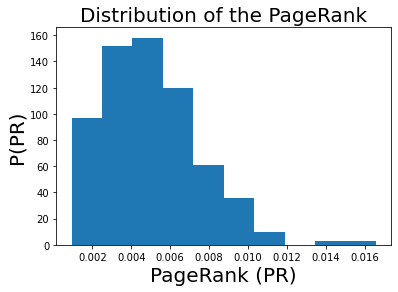

In [22]:
plt.figure(figsize=(6,4))
plt.hist(PR, density=True)
plt.title("Distribution of the PageRank", fontsize = 20)
plt.ylabel("P(PR)", fontsize = 20)
plt.xlabel("PageRank (PR)",fontsize = 20)
plt.savefig('pagerank.eps')
plt.show(True)


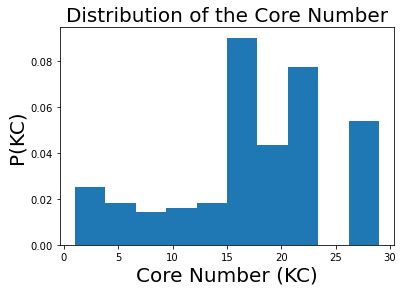

In [23]:
KC= dict(nx.core_number(jazz))
#print('k-core:', KC)
KC = list(KC.values())

plt.figure(figsize=(6,4))
plt.hist(KC, density=True)
plt.title("Distribution of the Core Number", fontsize = 20)
plt.ylabel("P(KC)", fontsize = 20)
plt.xlabel("Core Number (KC)", fontsize = 20)
plt.savefig('kcore.eps')
plt.show(True)

[5.36256949 4.19331818 4.19331818 4.19331818 4.19331818 4.19331818
 4.19331818 4.19331818 4.19331818 4.19331818 4.19331818]


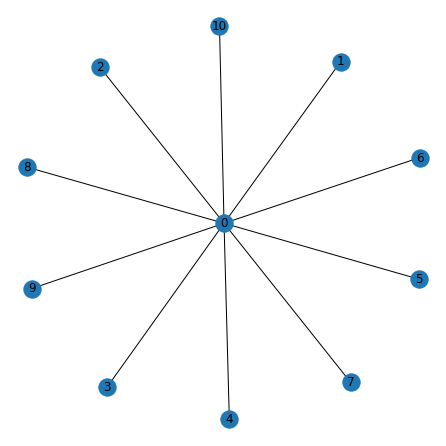

In [24]:
from scipy.linalg import expm

#G = nx.karate_club_graph()

#G = nx.Graph()
#G.add_edge('1','2'); G.add_edge('1','3'); G.add_edge('1','4'); G.add_edge('1','5'); G.add_edge('2','3'); 
#G.add_edge('4','5'); G.add_edge('2','6'); G.add_edge('3','7'); G.add_edge('4','8'); G.add_edge('5','9')
#G.add_edge('6','10'); G.add_edge('6','11'); G.add_edge('7','12'); G.add_edge('7','13'); G.add_edge('8','14')
#G.add_edge('8','15'); G.add_edge('9','16');G.add_edge('9','17')

N = 10
G = nx.star_graph(N)
N = len(G.nodes)

def acc(G):
    vk = dict(G.degree())
    vk = list(vk.values())
    A = nx.adjacency_matrix(G)
    P = np.zeros((N,N), dtype = 'float')
    for i in np.arange(0, N):
        for j in np.arange(0, N):
            if(vk[i] > 0):
                P[i,j] = A[i,j]/vk[i]
    P2 = expm(P)/np.exp(1)
    vacc = np.zeros(N, dtype = float)
    for i in np.arange(0, N):
        acc = 0
        for j in np.arange(0,N):
            if(P2[i,j] > 0):
                acc = acc + P2[i,j]*np.log(P2[i,j])
        acc = np.exp(-acc)
        vacc[i] = acc
    return vacc
print(acc(G))

plt.figure(figsize=(6,6))
pos=nx.spring_layout(G)
nx.draw(G, with_labels = True, pos = pos)
plt.show(True)

In [25]:
# For the star graph
# Accessibility of the hub
x = np.cosh(1)/np.exp(1)
y = np.sinh(1)/np.exp(1)
acchub = np.exp(-x*np.log(x) -y*np.log(y/(N-1)))
print('Hub acc:', acchub)
# Accessibility of the leaves
x = np.sinh(1)/np.exp(1)
y = (np.cosh(1)-1)/(np.exp(1)*(N-1))
accleaves = np.exp(-x*np.log(x) - (N-2)*y*np.log(y) - (1/np.exp(1) + y)*np.log(1/np.exp(1) + y))
print('Leaves acc:', accleaves)

Hub acc: 5.3625694900379335
Leaves acc: 4.193318176079801


In [26]:
import pandas as pd
df = pd.DataFrame({'K':vk,'CLC':CLC,'B':B,'EC':EC,'PR':PR,'KC':KC})
print(df)

      K       CLC         B        EC        PR  KC
0    23  0.429194  0.000851  0.058462  0.004054  18
1    21  0.461358  0.000576  0.062351  0.003630  18
2    29  0.484029  0.006629  0.063523  0.005209  18
3    43  0.461358  0.002208  0.107128  0.006771  29
4    12  0.442697  0.000856  0.023416  0.002550  11
..   ..       ...       ...       ...       ...  ..
193  18  0.444695  0.000275  0.040924  0.003321  17
194   1  0.269863  0.000000  0.000321  0.001032   1
195   2  0.341421  0.000000  0.001341  0.001133   2
196   1  0.347443  0.000000  0.001438  0.000929   1
197   1  0.303544  0.000000  0.000829  0.000960   1

[198 rows x 6 columns]


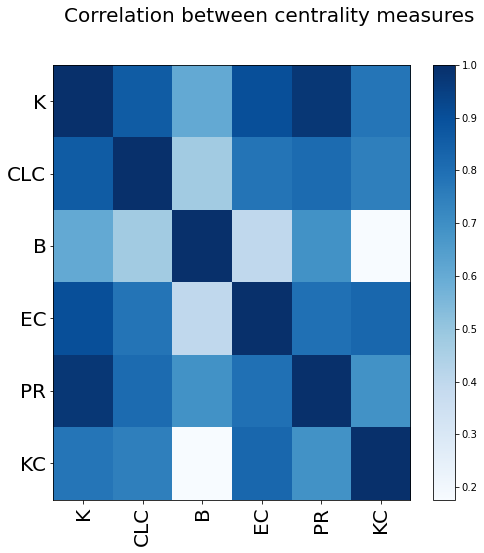

In [27]:
corr = df.corr()
#Plot Correlation Matrix using Matplotlib
plt.figure(figsize=(8,8))
plt.imshow(corr, cmap='Blues', interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation='vertical', fontsize=20)
plt.yticks(range(len(corr)), corr.columns, fontsize=20);
plt.suptitle('Correlation between centrality measures', fontsize=20)
plt.grid(False)
plt.show()

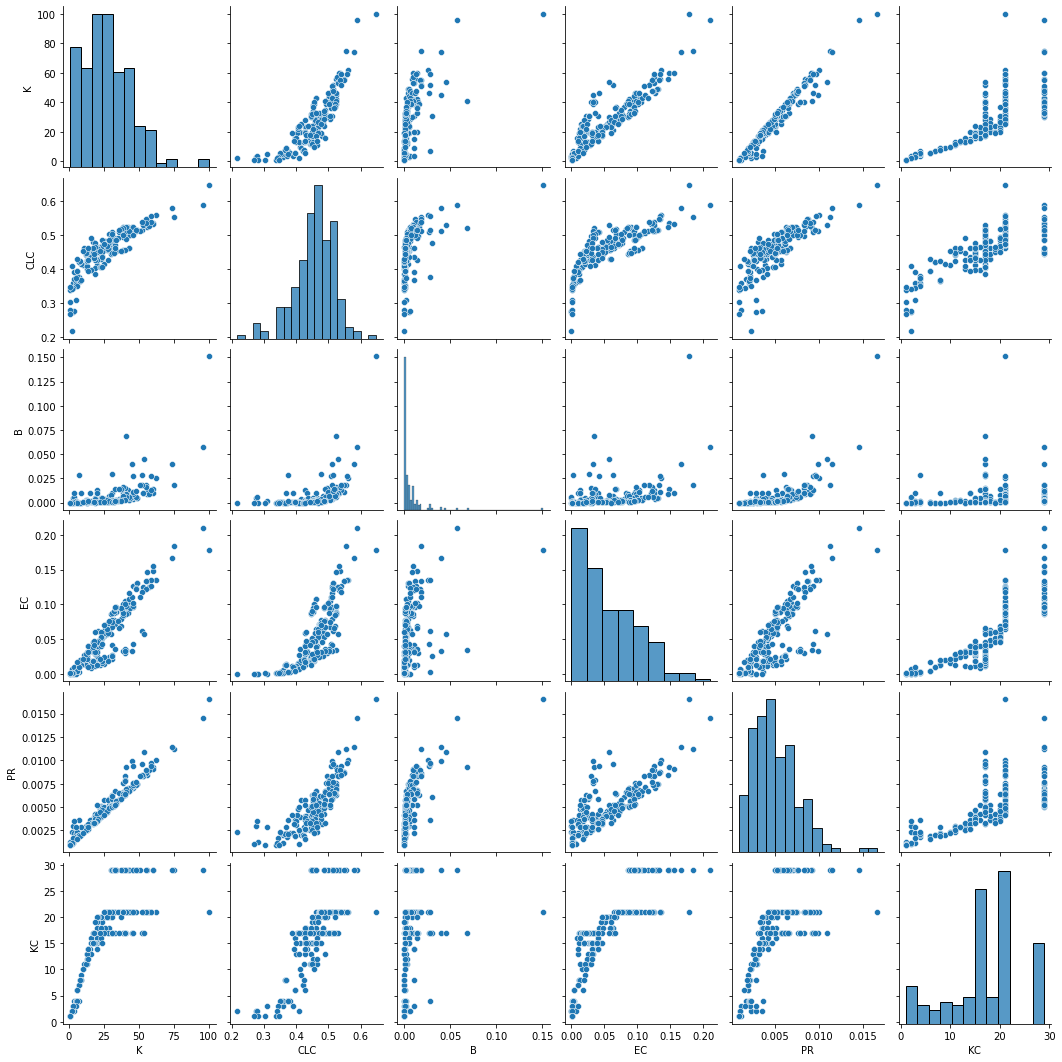

In [28]:
import seaborn as sns
# Basic correlogram
sns.pairplot(df)
plt.show(True)

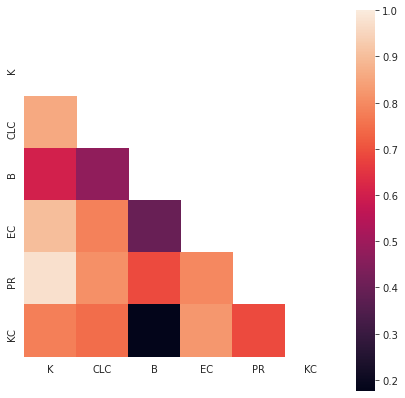

In [29]:
corr = df.corr()
plt.figure(figsize=(7, 7))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):ax = sns.heatmap(corr, mask=mask, vmax=1, square=True)
plt.show()

### Questão 1

In [9]:
EC = dict(nx.eigenvector_centrality(USairport, max_iter = 1000))
EC_list = list(EC.values())
EC_av = np.mean(EC_list)
print('Average eigenvetor centrality:', EC_av)

Average eigenvetor centrality: 0.022754398239423695


### Questão 2

In [10]:
B = dict(nx.betweenness_centrality(hamsterster))
B = list(B.values())
B_av = np.mean(B)
print('Average betweeness centrality:', B_av)

Average betweeness centrality: 0.0013732587816789746


In [11]:
vk = dict(hamsterster.degree())
vk = list(vk.values())
vk_av = np.mean(vk)
print('Average degree centrality', vk_av)

Average degree centrality 13.955257270693512


In [12]:
rho = np.corrcoef(B, vk)[0,1]
print('Pearson correlation coefficient:', rho)

Pearson correlation coefficient: 0.8242435188731515


### Questão 3

In [8]:
CLC = dict(nx.closeness_centrality(jazz))
CLC = list(CLC.values())
av_clc = np.mean(CLC)
print('Average closeness centrality:', av_clc)

Average closeness centrality: 0.45762949484981463


In [6]:
KC= dict(nx.core_number(jazz))
#print('k-core:', KC)
KC = list(KC.values())
print('Average k-core:',np.mean(KC))

Average k-core: 17.267676767676768


In [7]:
from scipy import stats
s = stats.spearmanr(CLC, KC)
print('Spearman rank correlation coefficient:', s[0])

Spearman rank correlation coefficient: 0.7353399833516918
